# Estimación por Kernel

In [1]:
### A) muestra
b=c(20.9,18.2,20,17.3,19.6,13.6,24.9,26.9,23.5,21.8,17,20.4,24.6,22.6,21.2,19.6,14.6,24.4,21.8,18.4,24.8,28.5,11.9,10,25.7,27.2,24.4,30.1,21.6,26,14.6,26.1,22.1,8.4,16.4,19.6,19.6,21.5,20.2,25.2,26.7,22.3,22.9,19.9,16.5,14.1,20.4,16.6,19.1,25.5,16.2,24.7,20,28.4,24.4,15.8,25.6,22.5,17.2,15.8,15.1,16.2,19.9,27.3,22.3,19.3,11.7,14.4,24.5,21.6,12.4,15.9,23.5,22.8,26.6,31,22.2,21.7,25.1,28.8,22.8,21.3,24.5,13.8,14.3,23.6,13.3,28.6,22.9,13.7,15.4,13.1,28.8,11.2,22.3,21.9,11.2,21.2,18.7,15)
n=length(b)


Comparación de estimadores

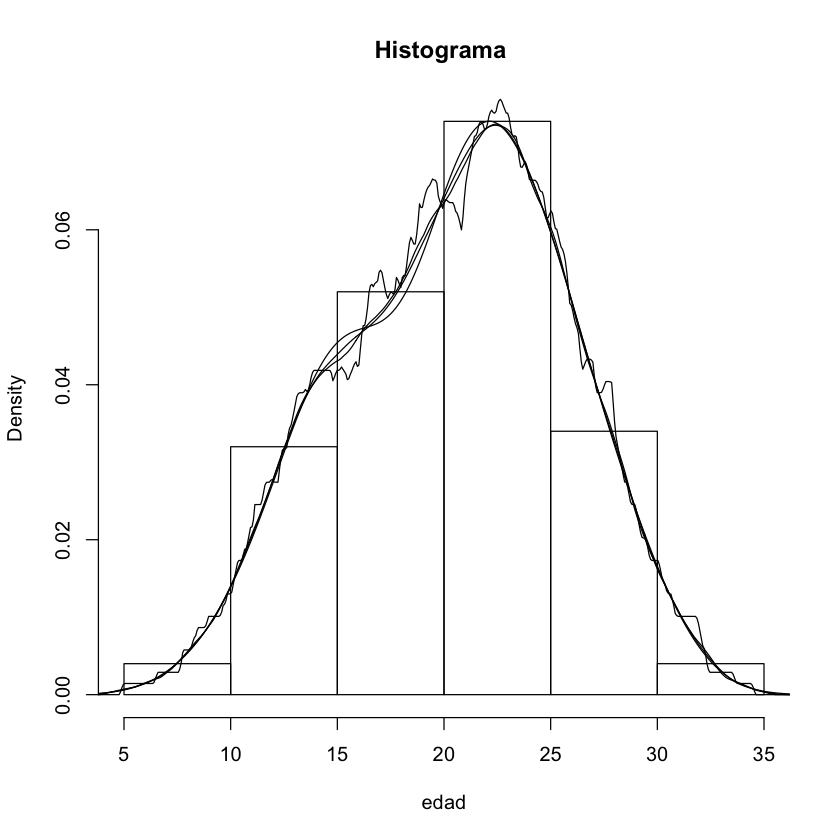

In [3]:
### C) Comparaciones
hist(b,prob=TRUE, main = paste("Histograma "),xlab = "edad")
lines(density(b,bw=2,kernel="epanechnikov"))   ##Más utilizadas
lines(density(b,bw=2,kernel="gaussian"))       ##Más utilizadas
lines(density(b,bw=2,kernel="biweight"))
lines(density(b,bw=2,kernel="rectangular"))


Selección de puntos donde se estimará la densidad

In [10]:
h = 2
points0= c(5,7,10,12,14,16,18,20,22,24,26,28,30,32,40)
points0 = seq(min(b)-2*h,max(b)+2*h,length.out=500); #points


In [ ]:
Densidad básica automática evaluada en los puntos

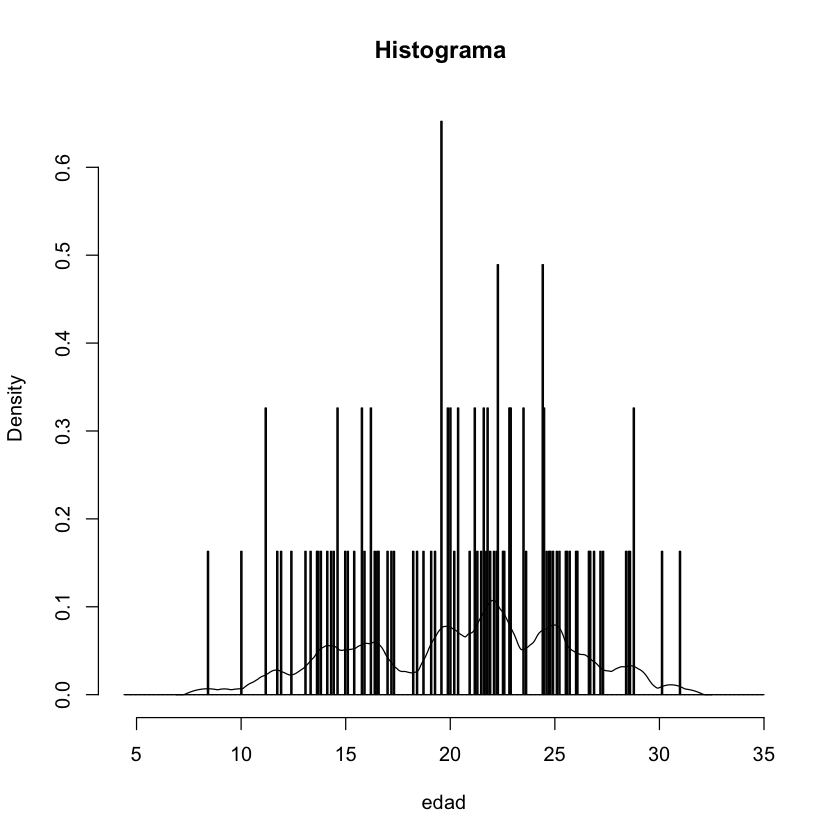

In [11]:
hist(b,breaks=points0,prob=TRUE,main = paste("Histograma "),xlab = "edad")
lines(density(b,bw=0.5,kernel="epanechnikov"))


In [ ]:
Redistribución de 1/n en cada punto seleccionado

In [12]:
points = c(7.5,12.5,17.5,22.5,27.5,32.5)

## Kernel uniforme

In [ ]:

Si x está en una vecindad con poca información, sumará pocas ponderaciones k(u)/h, que se reduce con la reducción

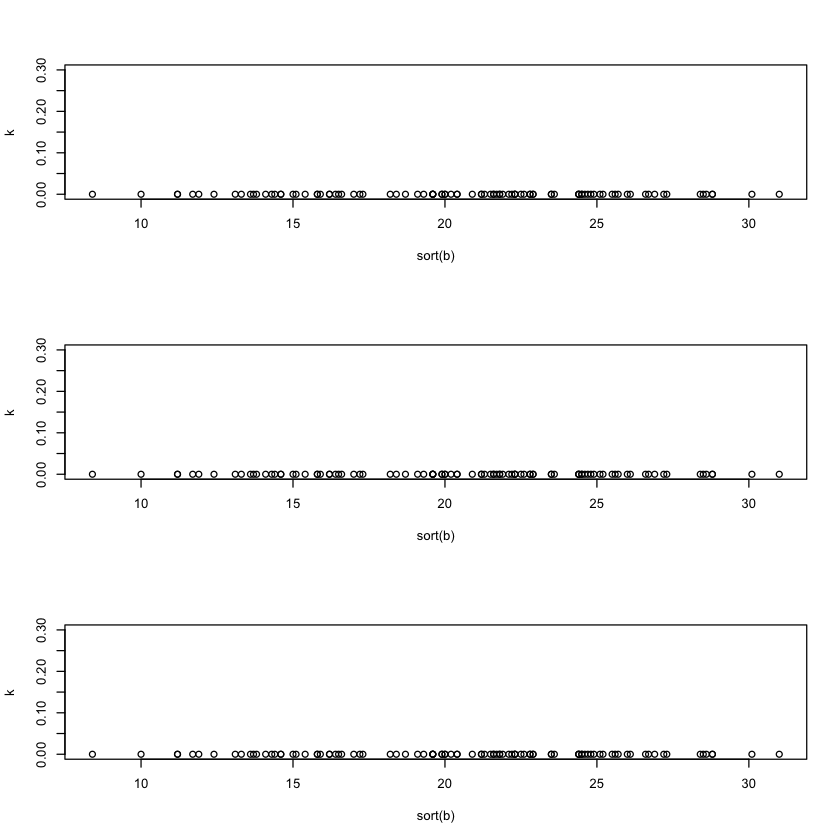

In [13]:
par(mfrow=c(3,1))
#Kernell Uniforme /h

h=2        #0.5
limy=0.3   #1.2
for (i in 2:4){
  z=(points[i]-sort(b))/h
  k=rep(0.5,length(z))/h
  for(j in 1:length(z)){if(z[j]<-1|z[j]>=1) k[j]=0}
  plot(sort(b),k,ylim=c(0,limy))
}


### Kernel Normal

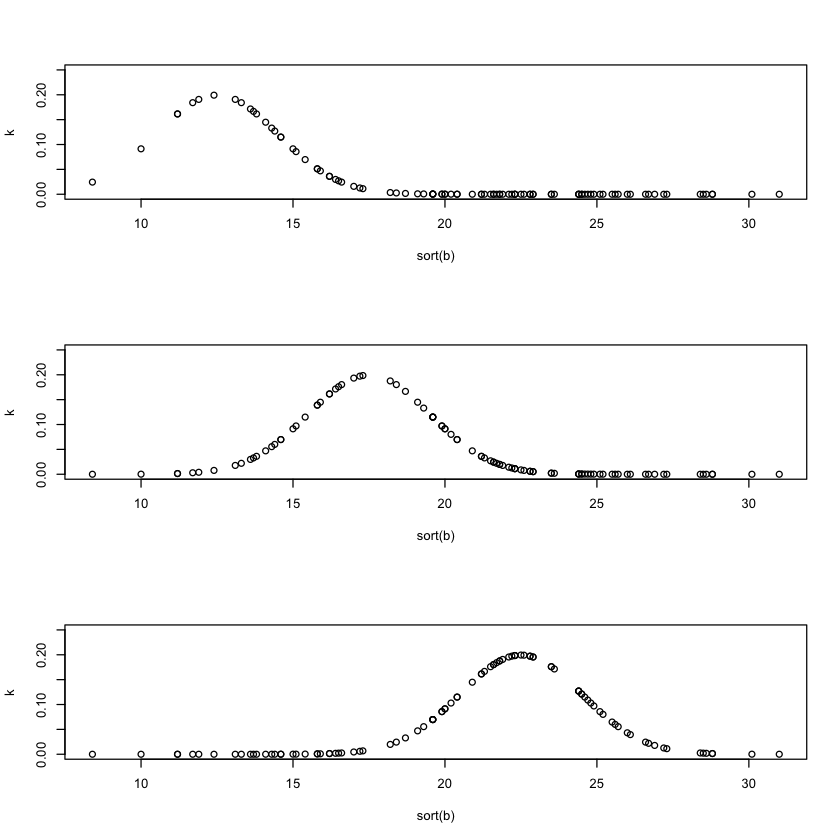

In [15]:
par(mfrow=c(3,1))
h=2
limy=0.25
for(i in 2:4){
  z=(points[i]-sort(b))/h
  k=(1/h)*(1/(2*pi)^0.5)*exp(-0.5*z*z)
  plot(sort(b),k,ylim=c(0,limy))
}


### Kernel Epanechnikov 

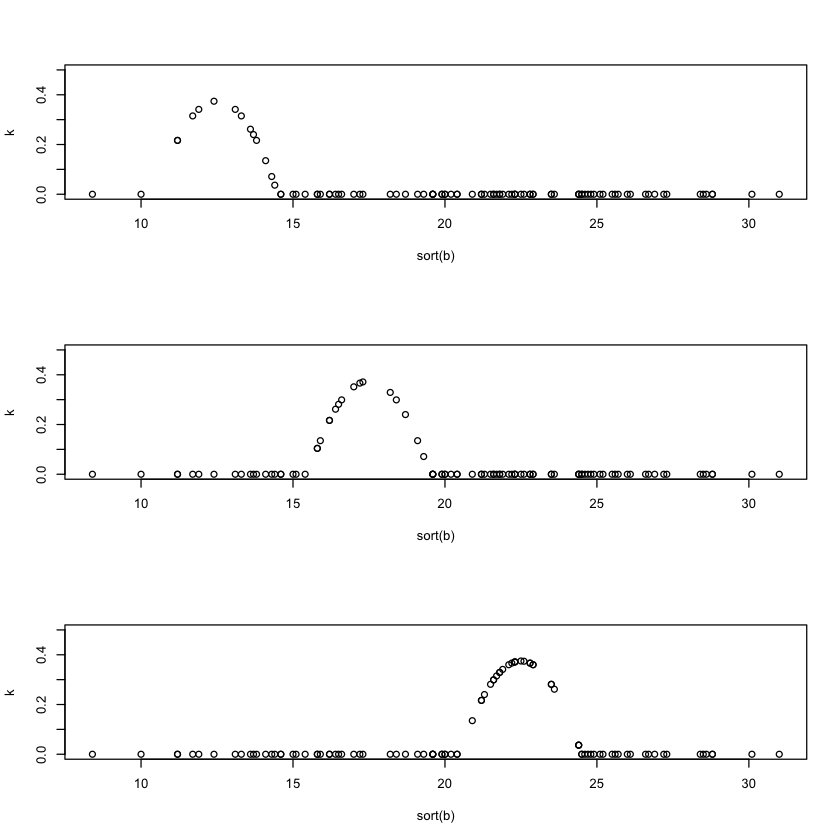

In [18]:
par(mfrow=c(3,1))
h=2
limy=0.5
k=NULL
for(i in 2:4){
  z=(points[i]-sort(b))/h
  for (j in 1:length(z)){
    if(z[j]>1 | z[j]<(-1)) {k[j]=0}
    else {k[j]= (3/(4*h))*(1-z[j]*z[j]) }
  }
  plot(sort(b),k,ylim=c(0,limy))
}

### Kernell Epanechnikov aumentando h 

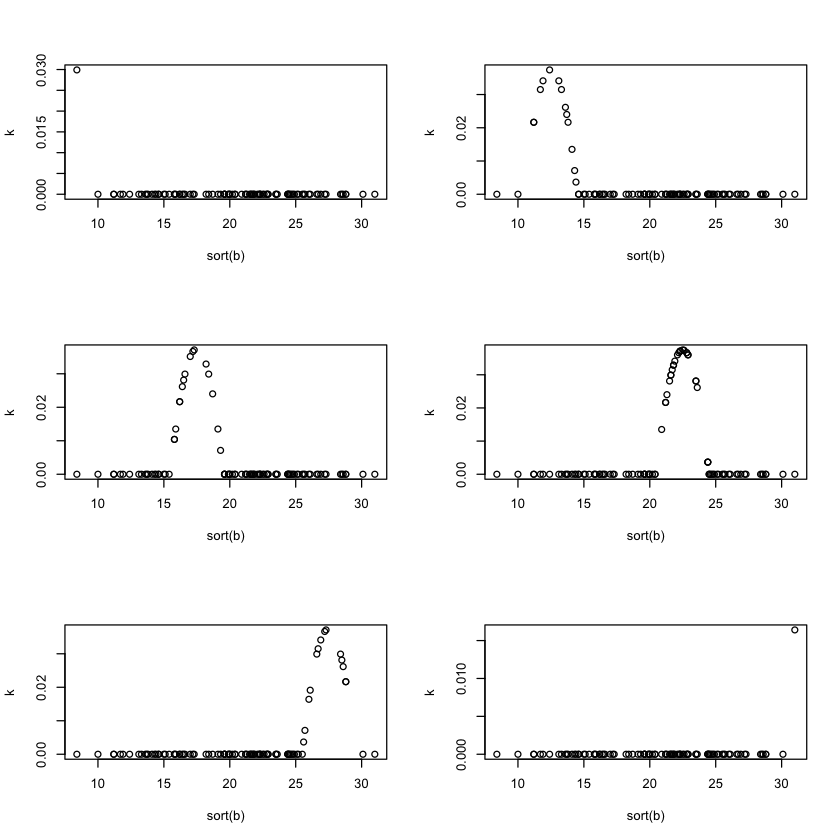

In [19]:
par(mfrow=c(3,2))
h=2
limy=0.4
K=NULL
for(i in 1:6){
  z=(points[i]-sort(b))/h
  k=3/4*(1-z*z)/(h*10)
  for (j in 1:length(z)){
    if(z[j]>=1 | z[j]<(-1)) {k[j]=0}
  }
  K=rbind(K,k)
  plot(sort(b),k)
}

### Comparación Kernell 

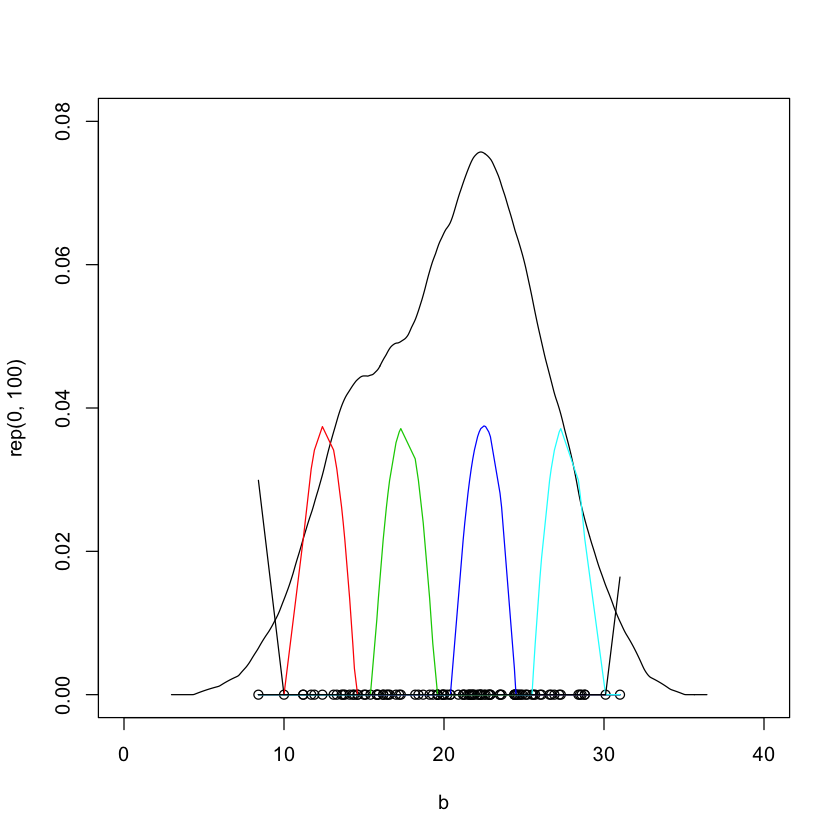

In [20]:
par(mfrow=c(1,1))
a1=density(b,kernel="epanechnikov")
plot(b,rep(0,100),ylim=c(0,0.08),xlim=c(0,40))
lines(a1)
lines(sort(b),K[1,],ylim=c(0,limy),col=1)
lines(sort(b),K[2,],ylim=c(0,limy),col=2)
lines(sort(b),K[3,],ylim=c(0,limy),col=3)
lines(sort(b),K[4,],ylim=c(0,limy),col=4)
lines(sort(b),K[5,],ylim=c(0,limy),col=5)
lines(sort(b),K[6,],ylim=c(0,limy),col=1)

## Cálculo de la densidad 

Lo importante es el ancho de banda, los diferentes métodos no difieren mucho.

### Cálculo de la densidad Epanechnikov

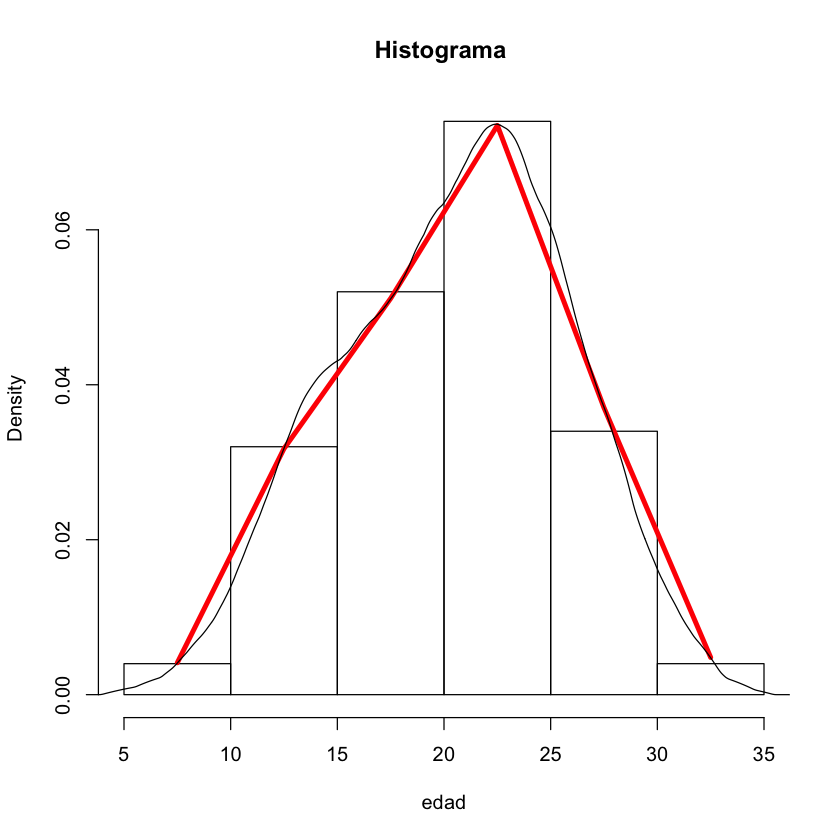

In [21]:
h=4.5

fe = NULL
for(i in 1:length(points)){
  z=(points[i]-b)/h
  k=3/4*(1-z*z)
  for (j in 1:length(z)){
    if(z[j]>=1 | z[j]<(-1)) {k[j]=0}
  }
  fe[i]=sum(k)/(h*n)
}
hist(b,prob=TRUE, main=paste("Histograma "),xlab="edad")
lines(points,fe,col=2,lwd=4)
lines(density(b,bw=2,kernel="epanechnikov"))


### Cálculo de la densidad Normal 

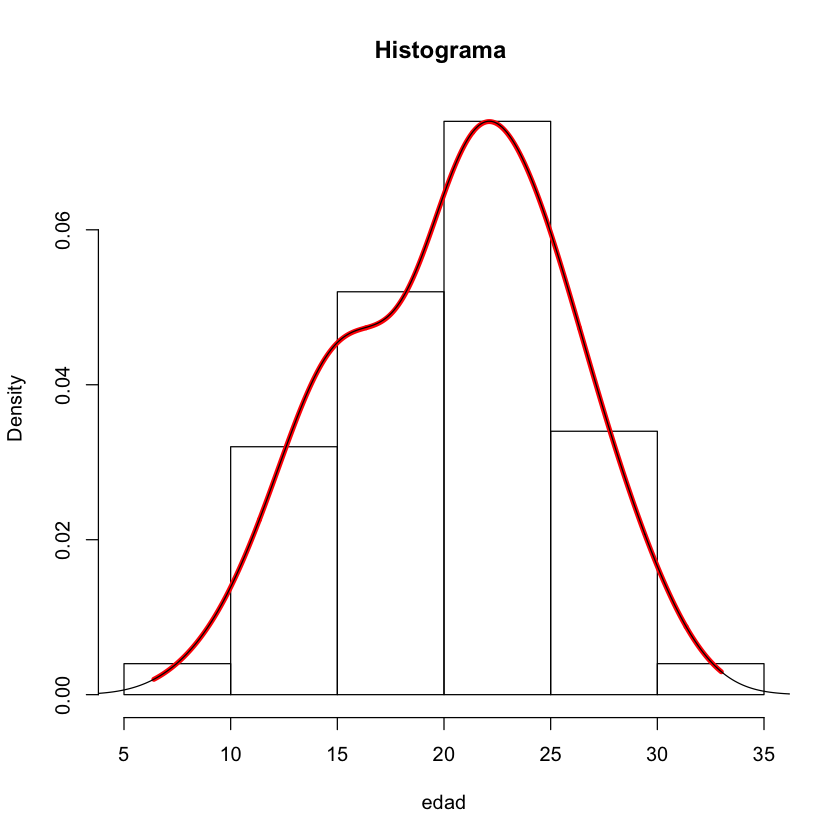

In [24]:
points = seq(min(b)-h,max(b)+h,by=0.05)
h=2
# Ciclo para el cálculo de la densidad .  Normal . Lo relevante es el valor del ancho de banda
fe = NULL
for(i in 1:length(points)){
  z=(points[i]-b)/h
  k=1/((2*pi)^(0.5))*(exp(-0.5*z*z))
  fe[i]=sum(k)/(h*n)
}
hist(b,prob=TRUE, main=paste("Histograma "),xlab="edad")
lines(points,fe,col=2,lwd=4)
lines(density(b,bw=2,kernel="gaussian"))


## Estimación máximo verosímil 

Estimación paramétrica por máxima verosimilitud.

In [26]:
## Verosimilitud a optimizar
fNorm<-function(d){
  mu=d[1];sigma=d[2]
  fN=1/((2*pi)^0.5*sigma)*exp(-0.5*((b-mu)/sigma)^2)
  L=-sum(log(fN))
}

Minimización de la verosimilitud

In [27]:
solN=optim(c(1,1),fNorm);solN   # Por defecto R minimiza

Warning message in log(fN):
“NaNs produced”ERROR while rich displaying an object: Error in vapply(seq_along(mapped), function(i) {: values must be length 1,
 but FUN(X[[5]]) result is length 0

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. repr_list_generic(obj, "html", "\t<li>%s</li>\n", "\t<dt>$%s</dt>\n\t\t<dd>%s</dd>\n", 
 .     "<strong>$%s</strong> = %s", "<ol>\n%s</ol>\n", "<dl>\n%s</dl>\n", 
 .

$par
[1] 20.494506  5.022176

$value
[1] 303.3616

$counts
function gradient 
     141       NA 

$convergence
[1] 0

$message
NULL


In [28]:
mu=solN$par[1];sigma=solN$par[2];
fNor=1/((2*pi)^0.5*sigma)*exp(-0.5*((points-mu)/sigma)^2)


Estimación máximo verosímil.

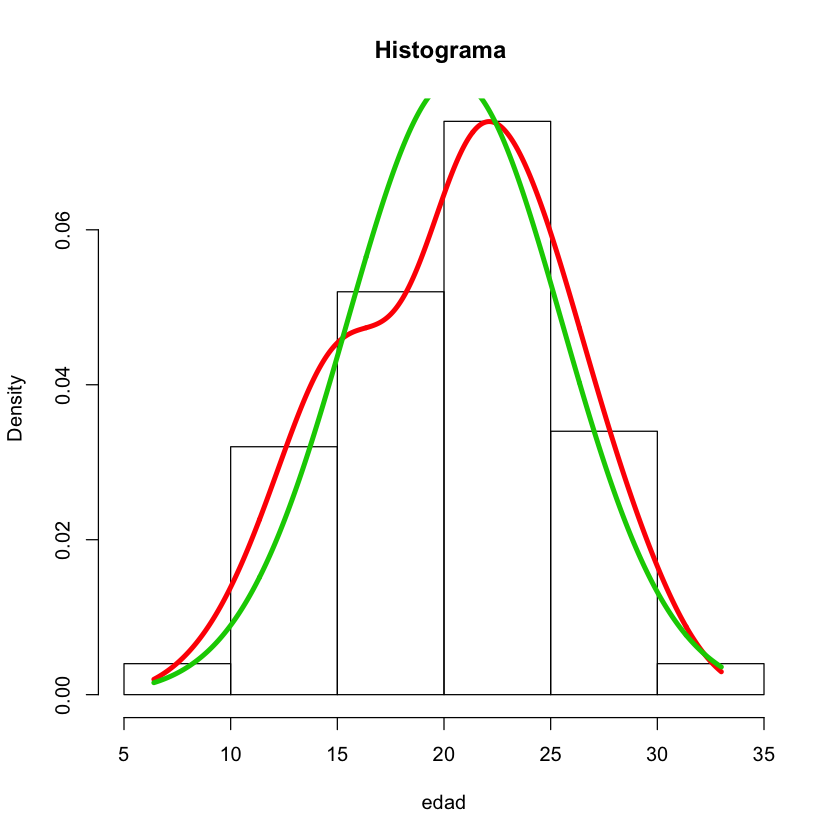

In [29]:
hist(b,prob=TRUE,main=paste("Histograma "),xlab="edad")
lines(points,fe,col=2,lwd=4)
#lines(density(b,bw=2,kernel="epanechnikov"))
lines(points,fNor,col=3,lwd=4)